# The Classic Cache Optimisation for Time Complexity Handling in Python

In [ ]:
from functools import lru_cache
import time


def simple_fibonacci(n):
    
    if n<2:
        return n
    else:
        return simple_fibonacci(n-1) + simple_fibonacci(n-2)
    

# Using the lru_cache - Least Recently Used Cache Functionality in Python

@lru_cache(maxsize = None) # Max Size can also be set to any value below 128 and a power of 2
def lru_cached_fibonacci(n):
    
    if n<2:
        return n
    else:
        return lru_cached_fibonacci(n-1) + lru_cached_fibonacci(n-2)
    
    
def total_time(fun , param):
    
    start = time.time()
    fun(param)
    end = time.time()
    return end-start

In [35]:
PARAM_VAL = 40

# Case - 1 : Without LRU_CACHE 

In [36]:
without_cache = [total_time(simple_fibonacci,i) for i in range(PARAM_VAL)]

# Case - 2 : With LRU_CACHE

In [37]:
with_cache = [total_time(lru_cached_fibonacci,i) for i in range(PARAM_VAL)]

# Plotting to Observe the difference

In [38]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame([with_cache,without_cache])
df = df.T
df.columns = ['With LRU' , 'Without LRU']
df.head()

,With LRU,Without LRU
0,2.145767e-06,0.000002
1,7.152557e-07,0.000001
2,9.536743e-07,0.000002
3,1.192093e-06,0.000002
4,0.000000e+00,0.000003


# The Final Story - End Game 

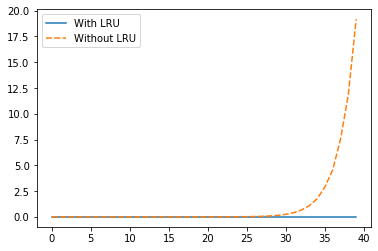

In [39]:
sns.lineplot(data = df)

### We see that till around 30 , both the Cached and Non-Cached functions take the same time, but,the time for without cached function increases exponentially after 30, whereas the cached function takes linear time!